<a href="https://colab.research.google.com/github/adithya-ananth/Deep-Learning/blob/main/NN_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import numpy as np
import pandas as pd

In [127]:
# random generator instance
rg = np.random.default_rng(seed=42)

def generate_data(n_features, n_values):
  features = rg.random((n_features, n_values))
  weights = rg.random((1, n_values))[0]
  targets = np.random.choice([0,1], n_features)

  data = pd.DataFrame(features, columns=["x0","x1","x2","x3","x4","x5","x6"])
  data["Targets"] = targets

  return data, weights

In [128]:
# get summation of w*x + b (f=wx+b)
def get_weighted_sum(feature, weights, bias):
  return np.dot(feature, weights) + bias

In [129]:
# apply sigmoid function
def sigmoid(weighted_sum):
  return 1 / (1 + np.exp(-weighted_sum))

In [130]:
# use cross-entropy loss
def cross_entropy_loss(target, output):
  return -target * np.log10(output) - (1 - target) * np.log10(1 - output)

In [131]:
# gradient descent for weights
def update_weights(weights, learning_rate, target, prediction, feature):
  new_weights = []
  for x, w in zip(feature, weights):
    new_weights.append(w + learning_rate * (target - prediction) * x)

  return new_weights

In [132]:
# gradient descent for bias
def update_bias(bias, learning_rate, target, prediction):
  return bias + learning_rate * (target - prediction)

In [133]:
bias = 0.5
learning_rate = 0.01
epochs = 50
epoch_loss = []

data, weights = generate_data(50,7)

def train_model(data, weights, bias, leanring_rate, epochs):
  for e in range(epochs):
    losses = []
    for i in range(len(data)):
      # slice last column
      feature = data.iloc[i][:-1]
      target = data.iloc[i][-1]

      w_sum = get_weighted_sum(feature, weights, bias)
      prediction = sigmoid(w_sum)

      loss = cross_entropy_loss(target, prediction)
      losses.append(loss)

      # graident descent
      weights = update_weights(weights, learning_rate, target, prediction, feature)
      bias = update_bias(bias, learning_rate, target, prediction)

    avg_loss = np.mean(losses)
    epoch_loss.append(avg_loss)
    print("*******************************")
    print(f"Epoch {e+1} loss: {avg_loss}")

In [134]:
train_model(data, weights, bias, learning_rate, epochs)

*******************************
Epoch 1 loss: 0.49072915069989487
*******************************
Epoch 2 loss: 0.42137247209442114
*******************************
Epoch 3 loss: 0.3731470402076048
*******************************
Epoch 4 loss: 0.34265423587626936
*******************************
Epoch 5 loss: 0.32475225715777173
*******************************
Epoch 6 loss: 0.3147230977504339
*******************************
Epoch 7 loss: 0.3092187550690615
*******************************
Epoch 8 loss: 0.30618962935759214
*******************************
Epoch 9 loss: 0.30448110019454067
*******************************
Epoch 10 loss: 0.30347100721001263
*******************************
Epoch 11 loss: 0.30283127570121027
*******************************
Epoch 12 loss: 0.30239027047718114
*******************************
Epoch 13 loss: 0.30205811053740345
*******************************
Epoch 14 loss: 0.30178736896923947
*******************************
Epoch 15 loss: 0.3015526864861816
********

<Axes: >

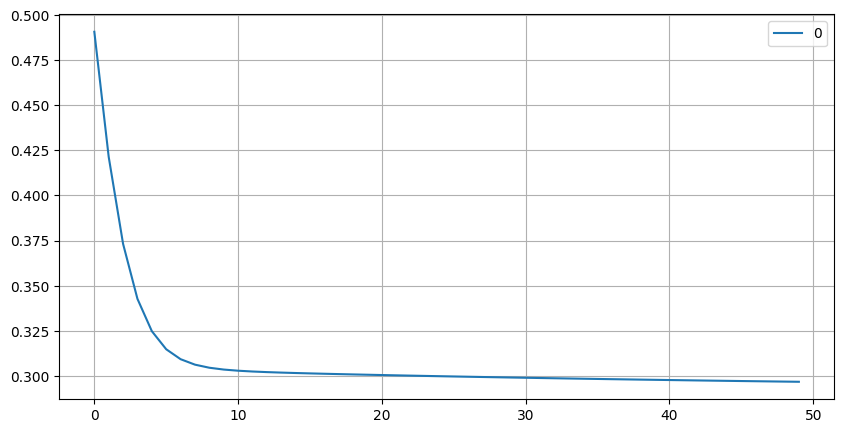

In [135]:
# plot avg loss
df = pd.DataFrame(epoch_loss)
df.plot(kind="line", grid=True, figsize=(10,5))